Device: cuda
Classes: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


d:\Anaconda\envs\plant\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Anaconda\envs\plant\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Phase A Epoch [1/10] Train Loss: 0.7075 | Train Acc: 0.8055 | Val Loss: 0.3173 | Val Acc: 0.9072
Phase A Epoch [2/10] Train Loss: 0.3607 | Train Acc: 0.8889 | Val Loss: 0.2282 | Val Acc: 0.9286
Phase A Epoch [3/10] Train Loss: 0.3207 | Train Acc: 0.8973 | Val Loss: 0.2367 | Val Acc: 0.9189
Phase A Epoch [4/10] Train Loss: 0.2954 | Train Acc: 0.9011 | Val Loss: 0.2073 | Val Acc: 0.9320
Phase A Epoch [5/10] Train Loss: 0.2847 | Train Acc: 0.9054 | Val Loss: 0.1608 | Val Acc: 0.9461
Phase A Epoch [6/10] Train Loss: 0.2800 | Train Acc: 0.9052 | Val Loss: 0.1570 | Val Acc: 0.9485
Phase A Epoch [7/10] Train Loss: 0.2693 | Train Acc: 0.9075 | Val Loss: 0.1631 | Val Acc: 0.9470
Phase A Epoch [8/10] Train Loss: 0.2574 | Train Acc: 0.9125 | Val Loss: 0.1658 | Val Acc: 0.9451
Phase A Epoch [9/10] Train Loss: 0.2544 | Train Acc: 0.9132 | Val Loss: 0.1488 | Val Acc: 0.9480
Phase A Epoch [10/10] Train Loss: 0.2577 | Train Acc: 0.9103 | Val Loss: 0.1631 | Val Acc: 0.9446
Phase B Epoch [1/5] Train Los

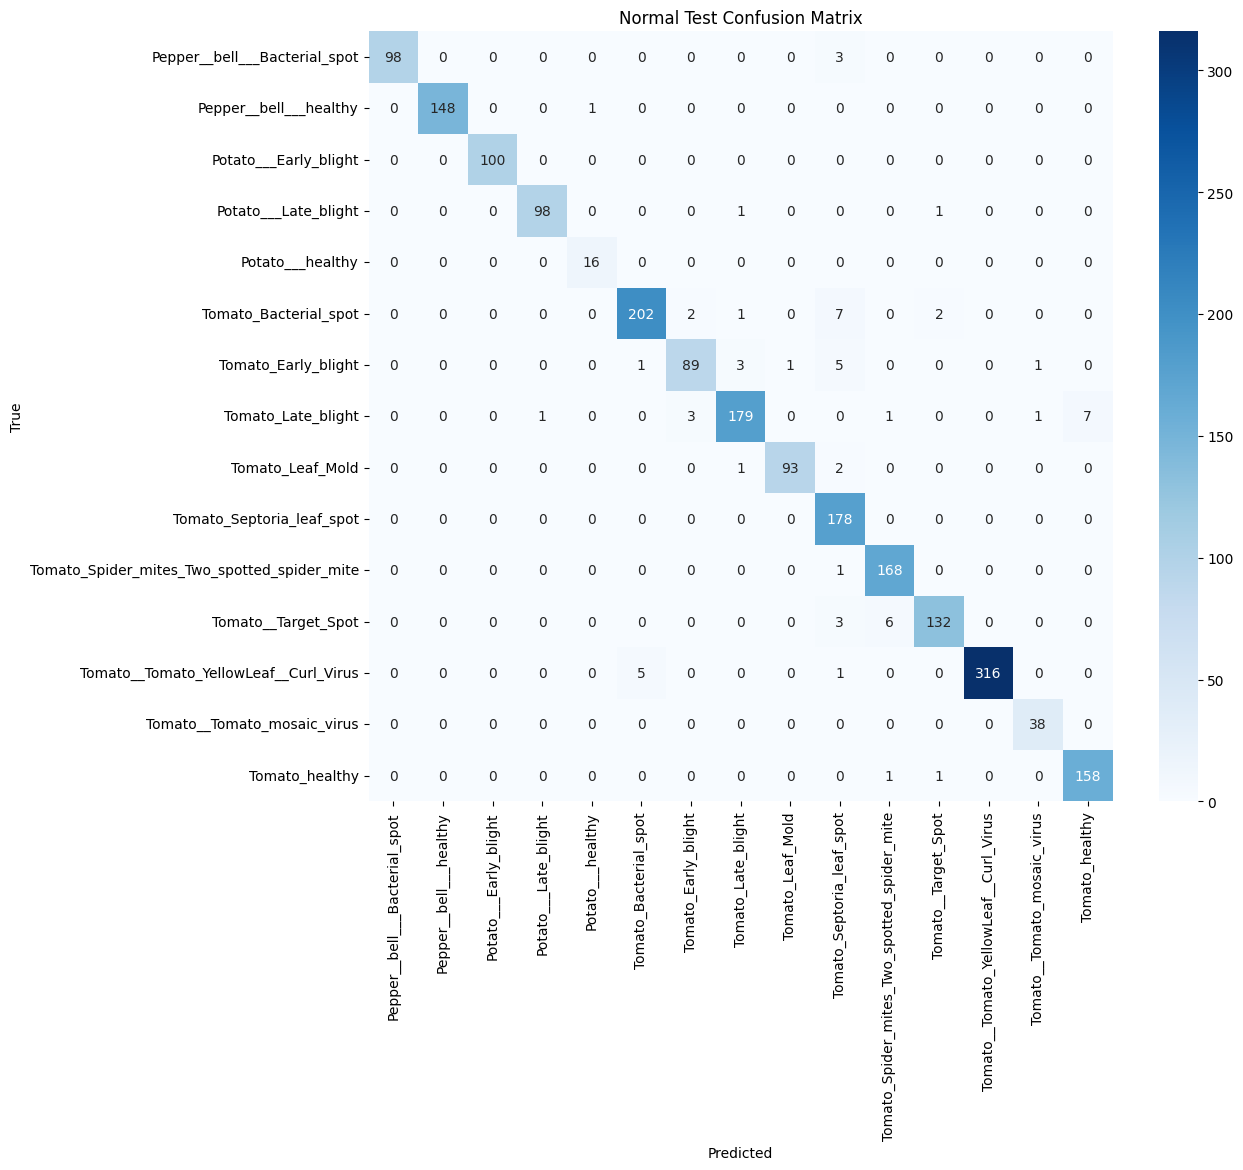


Hard Aug Test Accuracy: 0.1676

=== Hard Aug Test Classification Report ===
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot     0.6667    0.0198    0.0385       101
                     Pepper__bell___healthy     0.4222    0.2550    0.3180       149
                      Potato___Early_blight     0.0000    0.0000    0.0000       100
                       Potato___Late_blight     0.0000    0.0000    0.0000       100
                           Potato___healthy     0.0000    0.0000    0.0000        16
                      Tomato_Bacterial_spot     0.0000    0.0000    0.0000       214
                        Tomato_Early_blight     0.0960    0.3800    0.1532       100
                         Tomato_Late_blight     0.1266    0.4531    0.1980       192
                           Tomato_Leaf_Mold     0.3333    0.0312    0.0571        96
                  Tomato_Septoria_leaf_spot     0.1709    0.3371    0.22

d:\Anaconda\envs\plant\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\plant\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Anaconda\envs\plant\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


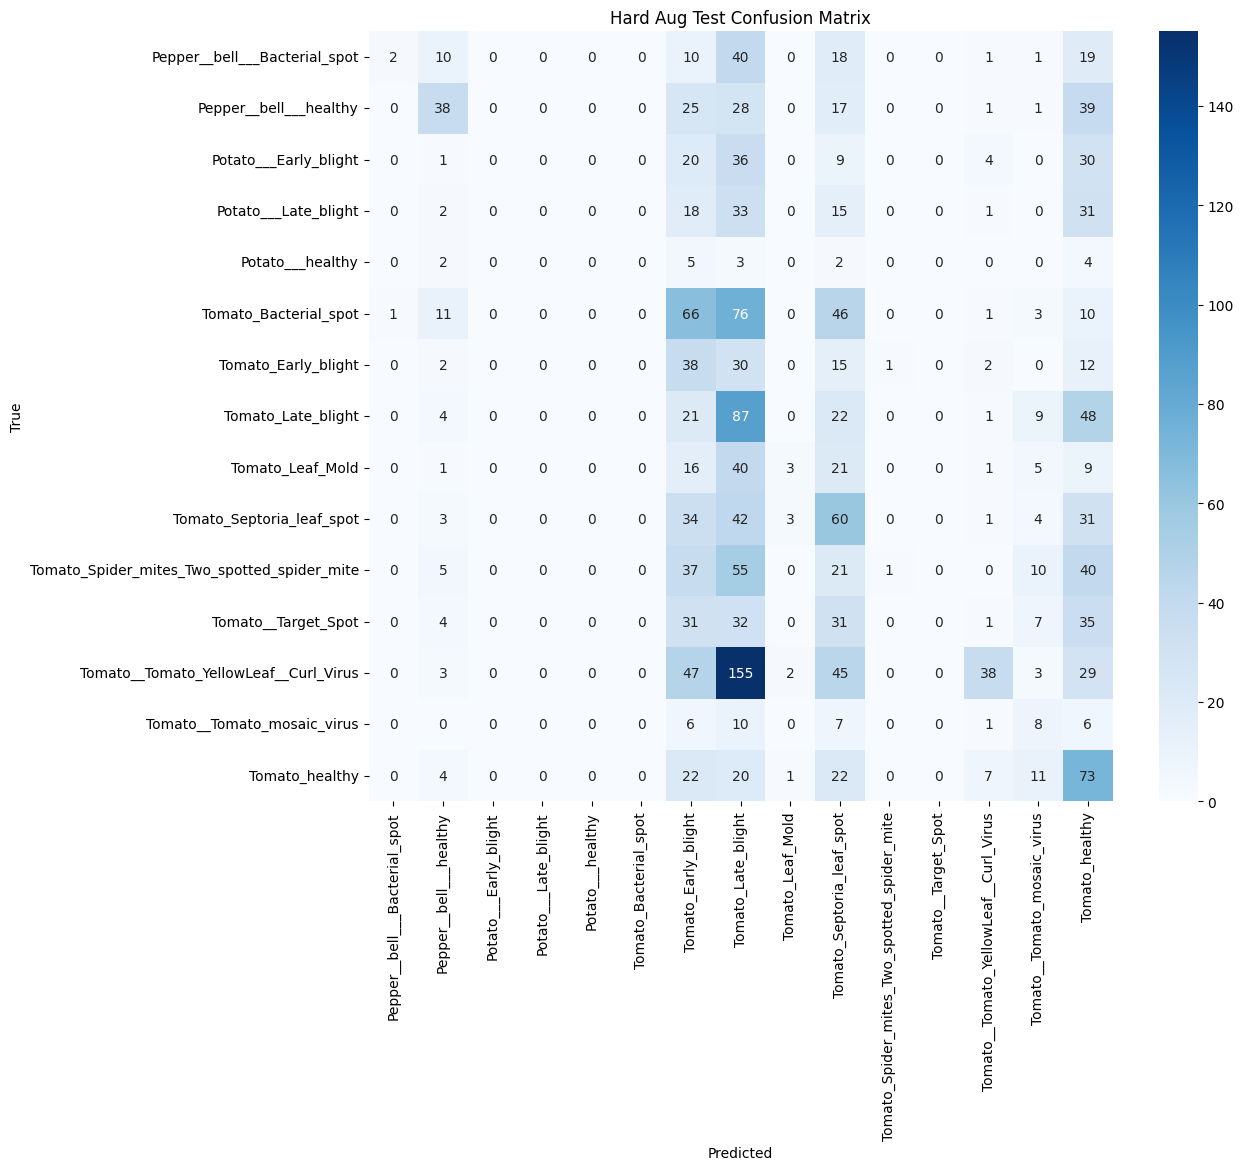

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Config
BATCH_SIZE = 32
IMG_SIZE = 224
EPOCHS_PHASE_A = 10
EPOCHS_PHASE_B = 5
LR_PHASE_A = 1e-3
LR_PHASE_B = 1e-4
DATA_ROOT = r"D:\dataset_split"
N_LAST_LAYERS = 20

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Data
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness = 0.2, contrast = 0.2, saturation = 0.2),
    transforms.ToTensor(),
])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(root = f"{DATA_ROOT}/train", transform = train_transform)
val_dataset = datasets.ImageFolder(root = f"{DATA_ROOT}/val", transform = val_transform)
test_dataset = datasets.ImageFolder(root = f"{DATA_ROOT}/test", transform = val_transform)

train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle = False)

num_classes = len(train_dataset.classes)
print("Classes:", train_dataset.classes)

# Model: MobileNetV2
mobilenet = models.mobilenet_v2(pretrained = True)
mobilenet.classifier[1] = nn.Linear(mobilenet.classifier[1].in_features, num_classes)
model = mobilenet.to(device)

criterion = nn.CrossEntropyLoss()

# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs, phase_name = "Phase"):
    for epoch in range(epochs):
        # Train
        model.train()
        running_loss, running_correct = 0.0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * imgs.size(0)
            running_correct += (outputs.argmax(1) == labels).sum().item()

        train_loss = running_loss / len(train_loader.dataset)
        train_acc = running_correct / len(train_loader.dataset)

        # Validation
        model.eval()
        val_loss, val_correct = 0.0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * imgs.size(0)
                val_correct += (outputs.argmax(1) == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = val_correct / len(val_loader.dataset)

        print(f"{phase_name} Epoch [{epoch+1}/{epochs}] "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
              f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")
    return model


# Phase A: Train classifier
for param in model.parameters():
    param.requires_grad = False
for param in model.classifier[1].parameters():
    param.requires_grad = True

optimizer = optim.Adam(model.classifier[1].parameters(), lr = LR_PHASE_A)
model = train_model(model, criterion, optimizer, train_loader, val_loader,
                    epochs = EPOCHS_PHASE_A, phase_name = "Phase A")

# Phase B: Fine-tuning last N layers
for name, param in model.named_parameters():
    param.requires_grad = False
for name, param in list(model.named_parameters())[-N_LAST_LAYERS:]:
    param.requires_grad = True

optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr = LR_PHASE_B)
model = train_model(model, criterion, optimizer, train_loader, val_loader,
                    epochs = EPOCHS_PHASE_B, phase_name = "Phase B")


# Evaluation helper
def evaluate_and_report(model, loader, class_names, desc = "Test"):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            preds = outputs.argmax(1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    acc = (all_preds == all_labels).sum() / len(all_labels)
    print(f"\n{desc} Accuracy: {acc:.4f}")
    print(f"\n=== {desc} Classification Report ===")
    print(classification_report(all_labels, all_preds, target_names = class_names, digits = 4))

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize = (12, 10))
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues",
                xticklabels = class_names, yticklabels = class_names)
    plt.title(f"{desc} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    return acc


# Normal test
normal_acc = evaluate_and_report(model, test_loader, test_dataset.classes, desc = "Normal Test")

# Hard aug test
hard_test_transform = transforms.Compose([
    transforms.RandomResizedCrop(IMG_SIZE, scale = (0.5, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ColorJitter(0.5, 0.5, 0.5),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
hard_test_dataset = datasets.ImageFolder(f"{DATA_ROOT}/test", transform = hard_test_transform)
hard_test_loader = DataLoader(hard_test_dataset, batch_size = BATCH_SIZE, shuffle = False, num_workers = 0)

hard_acc = evaluate_and_report(model, hard_test_loader, test_dataset.classes, desc = "Hard Aug Test")

# Save
torch.save(model.state_dict(), "D:/saved_models/mobilenetv2_finetuned.pt")
